# Game AI Predictor
## Machine Learning Model Building

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
df = pd.read_csv("high_diamond_ranked_10min.csv")
df.head()


,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
df["killDiff"] = df["blueKills"] - df["redKills"]


In [ ]:
X = df.drop(["blueWins","gameId"], axis=1)
y = df["blueWins"]

print("Features shape:", X.shape)


Features shape: (9879, 39)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

accuracy_log = accuracy_score(y_test, y_pred_log)
print("Logistic Regression Accuracy:", accuracy_log)


Logistic Regression Accuracy: 0.7327935222672065


Logistic Regression is used as a baseline model.
It provides a simple linear approach to predict match outcome.

In [ ]:
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)


Random Forest Accuracy: 0.7196356275303644


Random Forest is an ensemble learning algorithm that combines multiple decision trees.
It usually performs better than linear models for complex datasets.


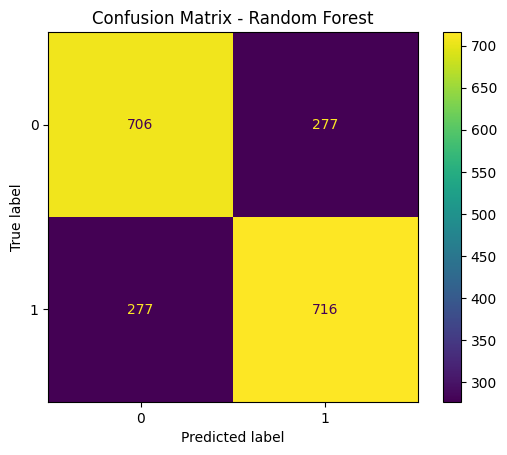

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test)
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.72      0.72      0.72       983
           1       0.72      0.72      0.72       993

    accuracy                           0.72      1976
   macro avg       0.72      0.72      0.72      1976
weighted avg       0.72      0.72      0.72      1976



In [ ]:
print("Logistic Regression Accuracy:", accuracy_log)
print("Random Forest Accuracy:", accuracy_rf)


Logistic Regression Accuracy: 0.7327935222672065
Random Forest Accuracy: 0.7196356275303644


Conclusion:
We built a machine learning pipeline to predict match outcomes using early-game statistics.
Both models achieved around 72–73% accuracy.
Gold difference, experience difference and kill difference were found to be the most important predictors.
This demonstrates that early-game performance strongly influences match outcome.
